### Courtesy of Mastering OpenCV 4 with Pythonby Alberto Fernandez Villan

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# the first point is to create the ORB detector:
orb = cv2.ORB_create()

In [3]:
image37 = cv2.imread("C:/Users/Business Intelli/Desktop/cats vs dogs/train/dogs/dog.37.jpg", 1)
print('Image shape:', image37.shape)
print('Image dtype:', image37.dtype)
cv2.imshow('image', image37)
cv2.waitKey()
cv2.destroyAllWindows()

Image shape: (371, 400, 3)
Image dtype: uint8


In [4]:
# detect the keypoints in the loaded image:
keypoints = orb.detect(image37, None)

In [5]:
# compute the descriptors of the detected keypoints:
keypoints, descriptors = orb.compute(image37, keypoints)

In [6]:
# we can draw the detected keypoints using the cv2.drawKeypoints() function:
image_keypoints = cv2.drawKeypoints(image37, keypoints, None, color=(255, 0, 255), flags=0)

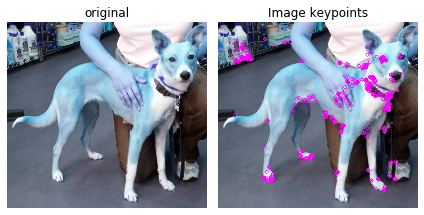

In [7]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image37, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Image keypoints')
plt.imshow(image_keypoints, cmap='gray')
plt.tight_layout()
plt.show()

### Feature Matching

In [8]:
# Brut-Force matcher to see how to match the detected features
#first step is to both detect keypoints and compute the descriptors:

In [9]:
orb = cv2.ORB_create()
keypoints_1, descriptors_1 = orb.detectAndCompute(image37, None)
keypoints_2, descriptors_2 = orb.detectAndCompute(image_keypoints, None)

In [10]:
# next step is to create the BF matcher object using cv2.BFMatcher():
bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [11]:
# match the detected descriptors using the BFMatcher.match() method:
bf_matches = bf_matcher.match(descriptors_1, descriptors_2)

In [12]:
# sort the matches in ascending order of their distance:
bf_matches = sorted(bf_matches, key=lambda x: x.distance)

In [13]:
#draw the matches using the cv2.drawMatches() function:
result = cv2.drawMatches(image37, keypoints_1, image_keypoints, keypoints_2, bf_matches[:20], None, matchColor=(255, 255, 0), singlePointColor=(255, 0, 255), flags=0)

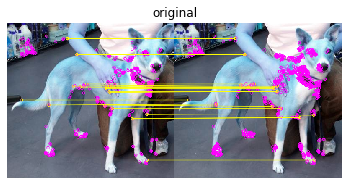

In [14]:
plt.figure()
plt.subplot(111)
plt.axis('off')
plt.title('original')
plt.imshow(result, cmap='gray')

### Feature matching and homography computation to find objects

In [18]:
# Extract the matched keypoints:
pts_src = np.float32([keypoints_1[m.queryIdx].pt for m in bf_matches]).reshape(-1, 1, 2)
pts_dst = np.float32([keypoints_2[m.trainIdx].pt for m in bf_matches]).reshape(-1, 1, 2)

In [19]:
# Find homography matrix:
M, mask = cv2.findHomography(pts_src, pts_dst, cv2.RANSAC, 5.0)

In [22]:
# Get the corner coordinates of the 'query' image:
h, w = image37.shape[:2]
pts_corners_src = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

In [23]:
pts_corners_dst = cv2.perspectiveTransform(pts_corners_src, M)

In [25]:
# Draw corners of the detected object:
img_obj = cv2.polylines(image_keypoints, [np.int32(pts_corners_dst)], True, (0, 255, 255), 10)


In [28]:
# Draw matches:
img_matching = cv2.drawMatches(image37, keypoints_1, img_obj, keypoints_2, bf_matches, None,
                               matchColor=(255, 255, 0), singlePointColor=(255, 0, 255), flags=0)

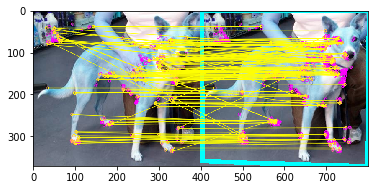

In [32]:
# Plot the images:
plt.imshow(img_obj)
plt.imshow(img_matching)

# Show the Figure:
plt.show()